In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random as rd

#definisco la decisione delle porte per il conservativo, switch e new
doorsCons = np.array([0,0,0])
doorsSwitch = np.array([0,0,0])
doorsNew = np.array([0,0,0])

#numero di giocate
giocate = 1000

#definisco gli array dei punteggi delle giocate
winCons = np.array([])
winSwitch = np.array([])
winNew = np.array([])

#pongo tutti gli elementi degli array uguali a zero
for i in range (giocate-1):
    winCons = np.append(winCons,0)
    winSwitch = np.append(winSwitch,0)
    winNew = np.append(winNew,0)
    
#funzione per pulire l'array delle scelte
def clean():
    for i in range (3):
        doorsCons[i] = 0
        doorsSwitch[i] = 0
        doorsNew[i] = 0
        
#funzione per controllare in quale porta di trova la capra dopo la prima scelta      
def checkGoat(array):
    i=0
    while array[i] != 0 : 
        i+=1
    return i;

#PRIMA DECISIONE
for t in range(giocate-1):

    for i in range(t+1):
    
        #decido dove si trova la macchina e quale porta decide il conservatore e lo switcher
        dec = rd.randint(0,2)
    
        carCons = rd.randint(0,2)
        carNew = rd.randint(0,2)
    
        doorsCons[carCons] = 1
        doorsCons[dec] += 2
    
        doorsSwitch[carCons] = 1
        doorsSwitch[dec] += 2
    
        doorsNew[carNew] = 1
    
        #decido se il conservatore ha vinto
    
        if(doorsCons[dec]==3):
            winCons[t] += 1/(t+1)
   
    
        
    #SECONDA DECISIONE      
        #controllo in che porta (non scelta) si trova la capra dello Switch
        GoatSwitch = checkGoat(doorsSwitch)
    
        #cambio decisione switch tra le due rimanenti
        
        if (GoatSwitch + 1)%3 == dec:
            doorsSwitch[(GoatSwitch + 2)%3] += 2 
            choice = (GoatSwitch + 2)%3
        else:
            doorsSwitch[(GoatSwitch + 1)%3] += 2
            choice = (GoatSwitch + 1)%3
        doorsSwitch[dec] += -2
        
        #decido se switch ha vinto 
        if (doorsSwitch[choice] == 3):
            winSwitch[t] += 1/(t+1)
    
        
        #controllo dove si trova la capra del New    
        GoatNew = checkGoat(doorsNew)
        Choice_New = rd.randint(1,2)
        doorsNew[(GoatNew + Choice_New) %3] += 2
    
        if (doorsNew[(GoatNew + Choice_New) %3] == 3):
            winNew[t] += 1/(t+1)
        
        
        clean()

for i in range (giocate - 1):
    print(winCons[i]," ",winSwitch[i]," ",winNew[i])

0.0   1.0   1.0
0.0   1.0   0.5
0.6666666666666666   0.3333333333333333   0.0
0.25   0.75   1.0
0.6000000000000001   0.4   0.2
0.3333333333333333   0.6666666666666666   0.5
0.14285714285714285   0.857142857142857   0.42857142857142855
0.25   0.75   0.75
0.4444444444444444   0.5555555555555556   0.4444444444444444
0.1   0.8999999999999999   0.6
0.2727272727272727   0.7272727272727274   0.2727272727272727
0.08333333333333333   0.9166666666666667   0.6666666666666666
0.38461538461538464   0.6153846153846154   0.38461538461538464
0.21428571428571427   0.7857142857142855   0.5714285714285713
0.26666666666666666   0.7333333333333333   0.4666666666666666
0.1875   0.8125   0.3125
0.29411764705882354   0.7058823529411765   0.411764705882353
0.2222222222222222   0.777777777777778   0.38888888888888895
0.3157894736842105   0.6842105263157894   0.5263157894736842
0.44999999999999996   0.5499999999999999   0.5499999999999999
0.47619047619047616   0.5238095238095237   0.5714285714285714
0.4090909090

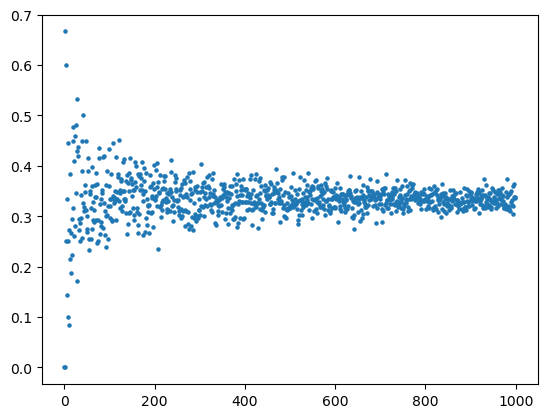

In [2]:
x = np.linspace(0,giocate-1,giocate-1)
plt.scatter(x,winCons, s=5)


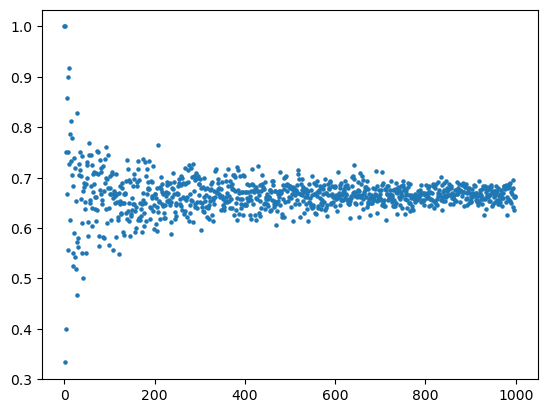

In [3]:
x = np.linspace(0,giocate-1,giocate-1)
plt.scatter(x,winSwitch, s=5)

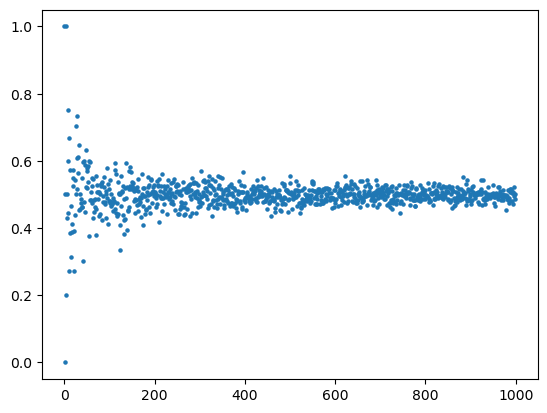

In [4]:
x = np.linspace(0,giocate-1,giocate-1)
plt.scatter(x,winNew, s=5)